<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product " />
</a> 

<img src="https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width="200" alt="cognitiveclass.ai logo" />

<h1>Test Sigmoid, Tanh, and Relu Activations Functions on the MNIST Dataset</h1>

<h2>Table of Contents</h2>
<p>In this lab, you will test sigmoid, tanh, and relu activation functions on the MNIST dataset.</p>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Train">Define Several Neural Network, Criterion Function, and Optimizer</a></li>
    <li><a href="#Test">Test Sigmoid, Tanh, and Relu</a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>
<p></p>
Estimated Time Needed: <strong>25 min</strong>
</div>

<hr>

<h2>Preparation</h2>

We'll need the following libraries

In [1]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

import matplotlib.pylab as plt
import numpy as np

<!--Empty Space for separating topics-->

<h2 id="Model">Neural Network Module and Training Function</h2> 

Define the neural network module or class using the sigmoid activation function: 

In [2]:
# Build the model with sigmoid function

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = self.linear2(x)
        return x


Define the neural network module or class using the Tanh activation function:

In [3]:
# Build the model with Tanh function

class NetTanh(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
     
    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))  
        x = self.linear2(x)
        return x

Define the neural network module or class using the Relu activation function:

In [4]:
# Build the model with Relu function

class NetRelu(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))  
        x = self.linear2(x)
        return x

Define a function to train the model. In this case, the function returns a Python dictionary to store the training loss for each iteration  and accuracy on the validation data.

In [13]:
# Define the function for training the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss':[], 'validation_accuracy':[]}  

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            print('epoch:'+str(epoch) +'--iteration:'+str(i) +'--/training_loss',(loss.data.item()))
            useful_stuff['training_loss'].append(loss.item())
            
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label=torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        print('validation_accuracy',(accuracy))
        useful_stuff['validation_accuracy'].append(accuracy)
        
    return useful_stuff

<!--Empty Space for separating topics-->

<h2 id="Makeup_Data">Make Some Data</h2> 

Load the training dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.

In [6]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Load the testing dataset by setting the parameter <code>train</code> to <code>False</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.

In [7]:
# Create the validation  dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Create the criterion function:  

In [8]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Create the training-data loader and the validation-data loader object:

In [9]:
# Create the training data loader and validation data loader object

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

<!--Empty Space for separating topics-->

<h2 id="Train">Define the Neural Network, Criterion Function, Optimizer, and Train the Model</h2> 

Create the criterion function: 

In [10]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Create the model with 100 hidden neurons:  

In [11]:
# Create the model object

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10
# sigmoid
model = Net(input_dim, hidden_dim, output_dim)

<!--Empty Space for separating topics-->

<h2 id="Test">Test Sigmoid, Tanh, and Relu</h2> 

Train the network by using the sigmoid activations function:

In [14]:
# Train a model with sigmoid function
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10
# sigmoid
model = Net(input_dim, hidden_dim, output_dim)

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=10)

epoch:0--iteration:0--/training_loss 2.3575618267059326
epoch:0--iteration:1--/training_loss 2.343902587890625
epoch:0--iteration:2--/training_loss 2.3467376232147217
epoch:0--iteration:3--/training_loss 2.3361692428588867
epoch:0--iteration:4--/training_loss 2.3370258808135986
epoch:0--iteration:5--/training_loss 2.336716890335083
epoch:0--iteration:6--/training_loss 2.3402140140533447
epoch:0--iteration:7--/training_loss 2.3367507457733154
epoch:0--iteration:8--/training_loss 2.3301374912261963
epoch:0--iteration:9--/training_loss 2.33178973197937
epoch:0--iteration:10--/training_loss 2.3232765197753906
epoch:0--iteration:11--/training_loss 2.3175666332244873
epoch:0--iteration:12--/training_loss 2.322019100189209
epoch:0--iteration:13--/training_loss 2.321633815765381
epoch:0--iteration:14--/training_loss 2.3207826614379883
epoch:0--iteration:15--/training_loss 2.3109326362609863
epoch:0--iteration:16--/training_loss 2.31496524810791
epoch:0--iteration:17--/training_loss 2.315723419

epoch:4--iteration:23--/training_loss 2.2676079273223877
epoch:4--iteration:24--/training_loss 2.2670483589172363
epoch:4--iteration:25--/training_loss 2.266226053237915
epoch:4--iteration:26--/training_loss 2.2656126022338867
epoch:4--iteration:27--/training_loss 2.2668118476867676
epoch:4--iteration:28--/training_loss 2.2653956413269043
epoch:4--iteration:29--/training_loss 2.2653989791870117
validation_accuracy 21.240000000000002
epoch:5--iteration:0--/training_loss 2.266011953353882
epoch:5--iteration:1--/training_loss 2.264781951904297
epoch:5--iteration:2--/training_loss 2.265458822250366
epoch:5--iteration:3--/training_loss 2.264286518096924
epoch:5--iteration:4--/training_loss 2.2650625705718994
epoch:5--iteration:5--/training_loss 2.26639461517334
epoch:5--iteration:6--/training_loss 2.2660934925079346
epoch:5--iteration:7--/training_loss 2.266275405883789
epoch:5--iteration:8--/training_loss 2.261300802230835
epoch:5--iteration:9--/training_loss 2.2630932331085205
epoch:5--it

epoch:9--iteration:15--/training_loss 2.2301628589630127
epoch:9--iteration:16--/training_loss 2.228647232055664
epoch:9--iteration:17--/training_loss 2.228825330734253
epoch:9--iteration:18--/training_loss 2.2270102500915527
epoch:9--iteration:19--/training_loss 2.2245655059814453
epoch:9--iteration:20--/training_loss 2.2276556491851807
epoch:9--iteration:21--/training_loss 2.2306320667266846
epoch:9--iteration:22--/training_loss 2.2249197959899902
epoch:9--iteration:23--/training_loss 2.227975606918335
epoch:9--iteration:24--/training_loss 2.226898193359375
epoch:9--iteration:25--/training_loss 2.224588394165039
epoch:9--iteration:26--/training_loss 2.223924160003662
epoch:9--iteration:27--/training_loss 2.225083589553833
epoch:9--iteration:28--/training_loss 2.222381591796875
epoch:9--iteration:29--/training_loss 2.2246904373168945
validation_accuracy 38.5


Train the network by using the Tanh activations function:

In [15]:
# Train a model with Tanh function

model_Tanh = NetTanh(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=10)

epoch:0--iteration:0--/training_loss 2.3230998516082764
epoch:0--iteration:1--/training_loss 2.3190529346466064
epoch:0--iteration:2--/training_loss 2.311002492904663
epoch:0--iteration:3--/training_loss 2.3089866638183594
epoch:0--iteration:4--/training_loss 2.307913303375244
epoch:0--iteration:5--/training_loss 2.303521156311035
epoch:0--iteration:6--/training_loss 2.294956922531128
epoch:0--iteration:7--/training_loss 2.2963991165161133
epoch:0--iteration:8--/training_loss 2.287778377532959
epoch:0--iteration:9--/training_loss 2.284477472305298
epoch:0--iteration:10--/training_loss 2.282047748565674
epoch:0--iteration:11--/training_loss 2.2793846130371094
epoch:0--iteration:12--/training_loss 2.2742223739624023
epoch:0--iteration:13--/training_loss 2.26827073097229
epoch:0--iteration:14--/training_loss 2.2673709392547607
epoch:0--iteration:15--/training_loss 2.2648189067840576
epoch:0--iteration:16--/training_loss 2.2622294425964355
epoch:0--iteration:17--/training_loss 2.2547461986

epoch:4--iteration:23--/training_loss 1.8119553327560425
epoch:4--iteration:24--/training_loss 1.8071633577346802
epoch:4--iteration:25--/training_loss 1.8118399381637573
epoch:4--iteration:26--/training_loss 1.7890254259109497
epoch:4--iteration:27--/training_loss 1.802810549736023
epoch:4--iteration:28--/training_loss 1.8055981397628784
epoch:4--iteration:29--/training_loss 1.8039541244506836
validation_accuracy 71.0
epoch:5--iteration:0--/training_loss 1.801230788230896
epoch:5--iteration:1--/training_loss 1.7801318168640137
epoch:5--iteration:2--/training_loss 1.7867991924285889
epoch:5--iteration:3--/training_loss 1.7769747972488403
epoch:5--iteration:4--/training_loss 1.7735058069229126
epoch:5--iteration:5--/training_loss 1.778213620185852
epoch:5--iteration:6--/training_loss 1.7571070194244385
epoch:5--iteration:7--/training_loss 1.7600206136703491
epoch:5--iteration:8--/training_loss 1.7562141418457031
epoch:5--iteration:9--/training_loss 1.7529670000076294
epoch:5--iteration:

epoch:9--iteration:15--/training_loss 1.3604234457015991
epoch:9--iteration:16--/training_loss 1.3612360954284668
epoch:9--iteration:17--/training_loss 1.3769786357879639
epoch:9--iteration:18--/training_loss 1.340186357498169
epoch:9--iteration:19--/training_loss 1.330876111984253
epoch:9--iteration:20--/training_loss 1.3272180557250977
epoch:9--iteration:21--/training_loss 1.344509243965149
epoch:9--iteration:22--/training_loss 1.3422483205795288
epoch:9--iteration:23--/training_loss 1.3223477602005005
epoch:9--iteration:24--/training_loss 1.3324958086013794
epoch:9--iteration:25--/training_loss 1.3157601356506348
epoch:9--iteration:26--/training_loss 1.330931544303894
epoch:9--iteration:27--/training_loss 1.314724326133728
epoch:9--iteration:28--/training_loss 1.3169136047363281
epoch:9--iteration:29--/training_loss 1.3181140422821045
validation_accuracy 77.11


Train the network by using the Relu activations function:

In [16]:
# Train a model with Relu function

modelRelu = NetRelu(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu,criterion, train_loader, validation_loader, optimizer, epochs=10)

epoch:0--iteration:0--/training_loss 2.3145174980163574
epoch:0--iteration:1--/training_loss 2.3085708618164062
epoch:0--iteration:2--/training_loss 2.3081023693084717
epoch:0--iteration:3--/training_loss 2.3056273460388184
epoch:0--iteration:4--/training_loss 2.3025057315826416
epoch:0--iteration:5--/training_loss 2.303579568862915
epoch:0--iteration:6--/training_loss 2.300042152404785
epoch:0--iteration:7--/training_loss 2.2980153560638428
epoch:0--iteration:8--/training_loss 2.2993788719177246
epoch:0--iteration:9--/training_loss 2.296480894088745
epoch:0--iteration:10--/training_loss 2.295502185821533
epoch:0--iteration:11--/training_loss 2.2931458950042725
epoch:0--iteration:12--/training_loss 2.2943365573883057
epoch:0--iteration:13--/training_loss 2.2886080741882324
epoch:0--iteration:14--/training_loss 2.2871007919311523
epoch:0--iteration:15--/training_loss 2.2856059074401855
epoch:0--iteration:16--/training_loss 2.285654067993164
epoch:0--iteration:17--/training_loss 2.285979

epoch:4--iteration:24--/training_loss 2.030714988708496
epoch:4--iteration:25--/training_loss 2.0228335857391357
epoch:4--iteration:26--/training_loss 2.0083541870117188
epoch:4--iteration:27--/training_loss 2.0187737941741943
epoch:4--iteration:28--/training_loss 2.022658586502075
epoch:4--iteration:29--/training_loss 2.0165674686431885
validation_accuracy 63.349999999999994
epoch:5--iteration:0--/training_loss 2.016752243041992
epoch:5--iteration:1--/training_loss 2.0048022270202637
epoch:5--iteration:2--/training_loss 2.000244617462158
epoch:5--iteration:3--/training_loss 2.0018534660339355
epoch:5--iteration:4--/training_loss 2.0070652961730957
epoch:5--iteration:5--/training_loss 2.004995107650757
epoch:5--iteration:6--/training_loss 1.9912148714065552
epoch:5--iteration:7--/training_loss 1.9972621202468872
epoch:5--iteration:8--/training_loss 1.9886506795883179
epoch:5--iteration:9--/training_loss 1.9898135662078857
epoch:5--iteration:10--/training_loss 1.9815070629119873
epoch:5

epoch:9--iteration:16--/training_loss 1.6054894924163818
epoch:9--iteration:17--/training_loss 1.5827374458312988
epoch:9--iteration:18--/training_loss 1.5775368213653564
epoch:9--iteration:19--/training_loss 1.5640045404434204
epoch:9--iteration:20--/training_loss 1.5756816864013672
epoch:9--iteration:21--/training_loss 1.5900107622146606
epoch:9--iteration:22--/training_loss 1.5614653825759888
epoch:9--iteration:23--/training_loss 1.5713039636611938
epoch:9--iteration:24--/training_loss 1.57291841506958
epoch:9--iteration:25--/training_loss 1.5540862083435059
epoch:9--iteration:26--/training_loss 1.5519648790359497
epoch:9--iteration:27--/training_loss 1.5574568510055542
epoch:9--iteration:28--/training_loss 1.5628306865692139
epoch:9--iteration:29--/training_loss 1.5553553104400635
validation_accuracy 73.99


<!--Empty Space for separating topics-->

<h2 id="Result">Analyze Results</h2> 

Compare the training loss for each activation: 

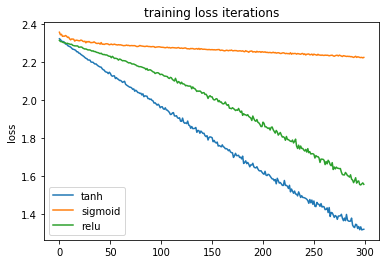

In [17]:
# Compare the training loss

plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()

Compare the validation loss for each model:  

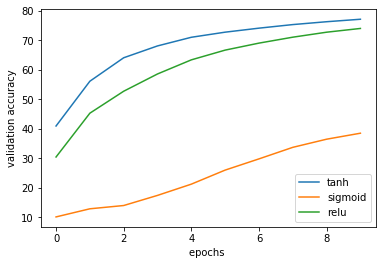

In [18]:
# Compare the validation loss

plt.plot(training_results_tanch['validation_accuracy'], label='tanh')
plt.plot(training_results['validation_accuracy'], label='sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label='relu') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')   
plt.legend()
plt.show()

<!--Empty Space for separating topics-->

## what activation function performed best ?

<a href="http://cocl.us/pytorch_link_bottom">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/notebook_bottom%20.png" width="750" alt="PyTorch Bottom" />

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD. 

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>

<hr>

Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.